In [6]:
import torchvision.datasets as datasets
import numpy as np
from sklearn.decomposition import PCA
from sklearn import decomposition# Load the MNIST dataset
from matplotlib import pyplot as plt
from PIL import Image

In [7]:
# Load the MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [8]:
# Get the first example from the training set
examples = enumerate(mnist_trainset)
batch_idx, (example_data, example_targets) = next(examples)

In [9]:
def Symmetry_feature(img):
    """Calculate horizontal and vertical symmetry features of an image."""
    horsym = 0  # Initialize horizontal asymmetry
    vertsym = 0  # Initialize vertical asymmetry
    w = 28  # Image width
    full = np.transpose(img.reshape(1, -1))  # Flatten and transpose the image
    
    # Calculate asymmetry for each half of the image
    for j in range(w // 2):
        jsym = w - j - 1
        
        # Indices for horizontal and vertical symmetry
        idxH = np.arange(j * w, (j + 1) * w)
        idxV = np.arange(j, w * w, w)
        idxHsym = np.arange(jsym * w, (jsym + 1) * w)
        idxVsym = np.arange(jsym, w * w, w)
        
        # Compare halves for asymmetry
        H = full[idxH]
        Hsym = full[idxHsym]
        V = full[idxV]
        Vsym = full[idxVsym]
        
        horsym += np.mean(np.abs(H - Hsym))
        vertsym += np.mean(np.abs(V - Vsym))
    
    # Compile symmetry features
    totsym = np.column_stack((horsym, vertsym))
    totsym = np.mean(totsym, axis=1, keepdims=True)
    totsym = -totsym  # Negate to represent symmetry
    return totsym

In [10]:
# Initialize a counter for the number of samples processed
counter = 0

# Process the first 500 images belonging to classes 1 and 8
for i in range(500):
    train_image, train_target = mnist_trainset[i]
    data_one = np.array(train_image)  # Convert image to NumPy array
    
    if (train_target == 1):
        # Calculate symmetry and intensity features for class 1
        Features_Symmetry = Symmetry_feature(data_one)
        Features_Intensity = np.mean(data_one)
        Label = 1
        
        # Initialize feature matrices
        if (counter == 0):
            Features = data_one.reshape(-1, 1)  # Reshape image to column
            Features2 = np.array([[Features_Symmetry.item(), Features_Intensity]])
            Targets = Label
        else:
            Features = np.c_[Features, data_one.reshape(-1, 1)]
            Features2 = np.vstack((Features2, [Features_Symmetry.item(), Features_Intensity]))
            Targets = np.c_[Targets, Label]        
        counter += 1  
        
    elif (train_target == 8):
        # Calculate symmetry and intensity features for class 8
        data_eight = np.array(train_image)
        Features_Symmetry = Symmetry_feature(data_eight)
        Features_Intensity = np.mean(data_eight)
        Label = 8
        
        if (counter == 0):
            Features = data_eight.reshape(-1, 1)
            Features2 = np.array([[Features_Symmetry.item(), Features_Intensity]])
            Targets = Label
        else:
            Features = np.c_[Features, data_eight.reshape(-1, 1)]
            Features2 = np.vstack((Features2, [Features_Symmetry.item(), Features_Intensity]))
            Targets = np.c_[Targets, Label]

In [11]:
# Transpose matrices to have observations as rows
Targets = np.transpose(Targets)
Features = np.transpose(Features)
# Ensure that Features and Targets have the same number of samples before PCA
print("Shape of PCA Features:", Features.shape)
print("Shape of Hand-Crafted Features:", Features2.shape)
print("Shape of Targets:", Targets.shape)

Shape of PCA Features: (105, 784)
Shape of Hand-Crafted Features: (105, 2)
Shape of Targets: (105, 1)


In [12]:
# Apply PCA to reduce dimensionality to two components
pca = decomposition.PCA(n_components=2)
pca.fit(Features)
ReducedFeatures = pca.transform(Features)

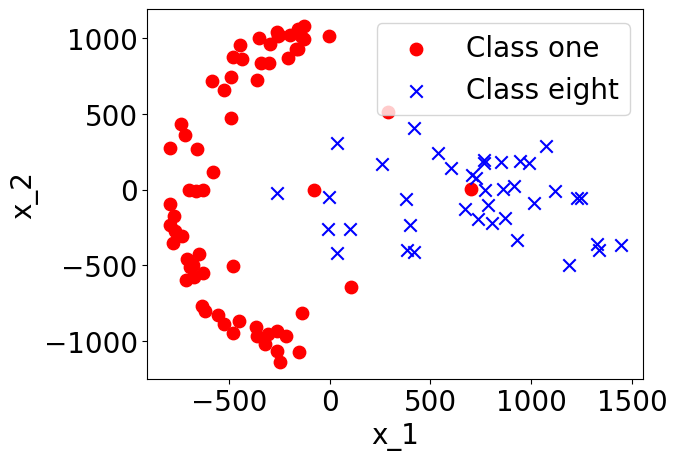

In [13]:
# Plot PCA results for visualization
idx = (~(Targets == 1)).reshape(-1,)
plt.scatter(ReducedFeatures[~idx, 0], ReducedFeatures[~idx, 1], s=80.0, c='r', marker='o', label='Class one')
plt.scatter(ReducedFeatures[idx, 0], ReducedFeatures[idx, 1], s=80.0, c='b', marker='x', label='Class eight')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('x_1', fontsize=20)
plt.ylabel('x_2', fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()

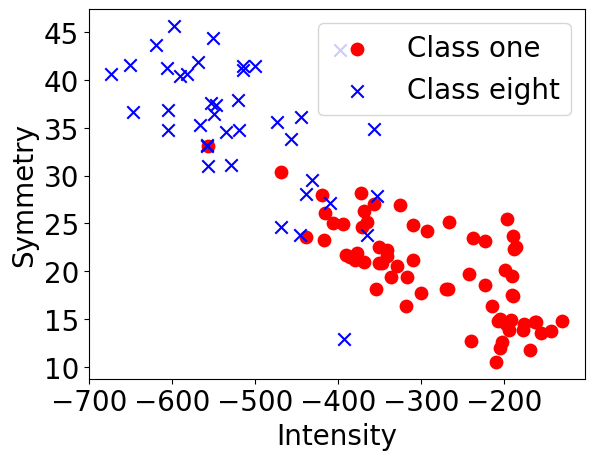

In [14]:
# Plot features using symmetry and intensity
plt.scatter(Features2[~idx, 0], Features2[~idx, 1], s=80.0, c='r', marker='o', label='Class one')
plt.scatter(Features2[idx, 0], Features2[idx, 1], s=80.0, c='b', marker='x', label='Class eight')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Intensity', fontsize=20)
plt.ylabel('Symmetry', fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()